In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
data=pd.read_csv('air_quality_missing.csv')

In [3]:
data.shape

(647511, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647437 non-null  float64
 6   NO2               647421 non-null  float64
 7   O3                647436 non-null  float64
 8   CO                647397 non-null  float64
 9   PM10              647416 non-null  float64
 10  PM2.5             647433 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [5]:
data.isna().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

<Axes: >

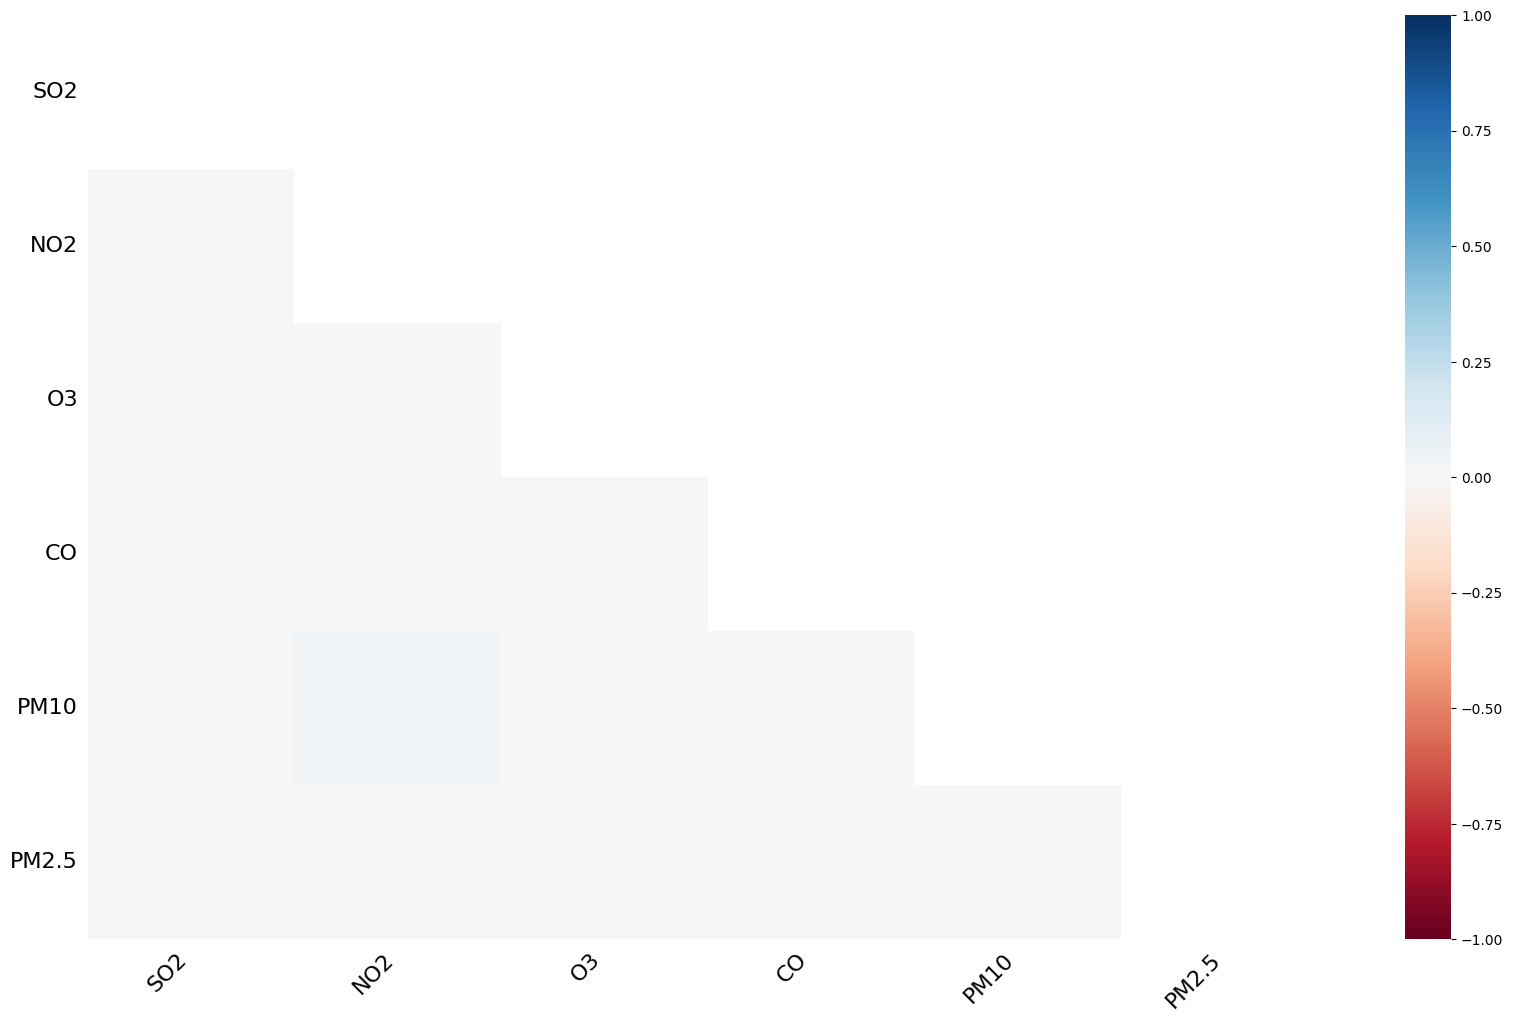

In [6]:
msno.heatmap(data)

In [7]:
missing_values=data.isnull().sum() / len(data) *100

In [8]:
table_missing_value=pd.DataFrame({
    'missing':missing_values
})

In [9]:
table_missing_value

,missing
Measurement date,0.000000
Station code,0.000000
Address,0.000000
Latitude,0.000000
Longitude,0.000000
SO2,0.011428
NO2,0.013899
O3,0.011583
CO,0.017606
PM10,0.014672


In [10]:
data['PM10'][70:100]

70    35.0
71    33.0
72    36.0
73    32.0
74    29.0
75    34.0
76    37.0
77    36.0
78    38.0
79    41.0
80    43.0
81    51.0
82    64.0
83    80.0
84    83.0
85    80.0
86    68.0
87    57.0
88    52.0
89    57.0
90    58.0
91    57.0
92    49.0
93    48.0
94    46.0
95    51.0
96    49.0
97    50.0
98    54.0
99    55.0
Name: PM10, dtype: float64

In [11]:
data[647495:647520]

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0
647501,12/31/2019 14:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.023,NaN,23.0,18.0
647502,12/31/2019 15:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.020,0.021,NaN,24.0,18.0
647503,12/31/2019 16:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.026,0.016,NaN,27.0,18.0
647504,12/31/2019 17:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.031,0.012,NaN,27.0,19.0


In [12]:
data[647495:647520]=data[647495:647520].ffill()

In [13]:
data[647495:647520]

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0
647501,12/31/2019 14:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.023,0.4,23.0,18.0
647502,12/31/2019 15:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.020,0.021,0.4,24.0,18.0
647503,12/31/2019 16:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.026,0.016,0.4,27.0,18.0
647504,12/31/2019 17:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.031,0.012,0.4,27.0,19.0


In [14]:
data['PM10']=data['PM10'].interpolate(limit_direction='both')

In [15]:
data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  104
PM10                  0
PM2.5                78
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647437 non-null  float64
 6   NO2               647421 non-null  float64
 7   O3                647436 non-null  float64
 8   CO                647407 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647433 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [ ]:
#one_hot_destination = pd.get_dummies(data.Address)

In [ ]:
#data = pd.concat([data, one_hot_destination], axis=1)

In [ ]:
|dfdfadfasdfasdfasfasdfasdfsdfhgdsfkmdfsoijfgdkojokllpmdfdfgsfdghfgjhfgjhfgjhfgjfghjfjhf

,101,102,103,104,105,106,107,108,109,110,...,116,117,118,119,120,121,122,123,124,125
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
647507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
647508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
647509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
